In [1]:
import matplotlib.pyplot as plt
import cv2


In [2]:
cat=cv2.imread('../Data/CATS_DOGS/train/CAT/0.jpg')

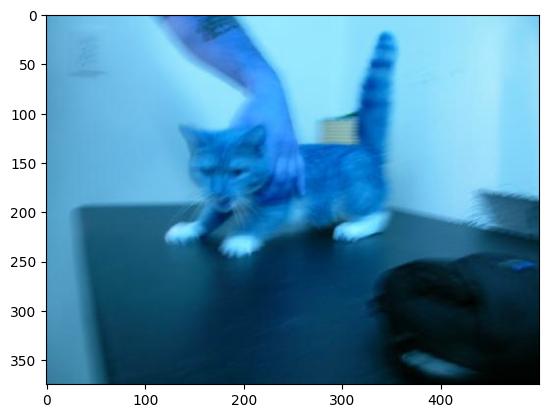

In [3]:
plt.imshow(cat)

In [5]:
cat  = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

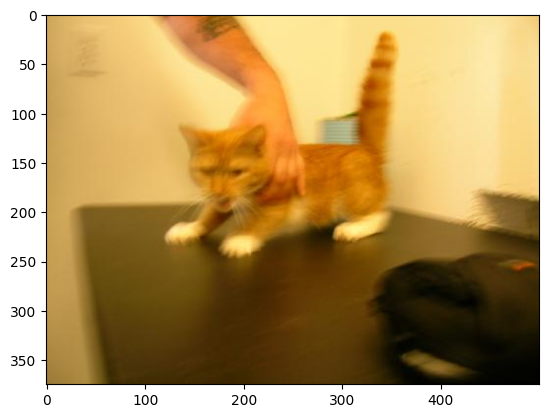

In [6]:
plt.imshow(cat)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen=ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

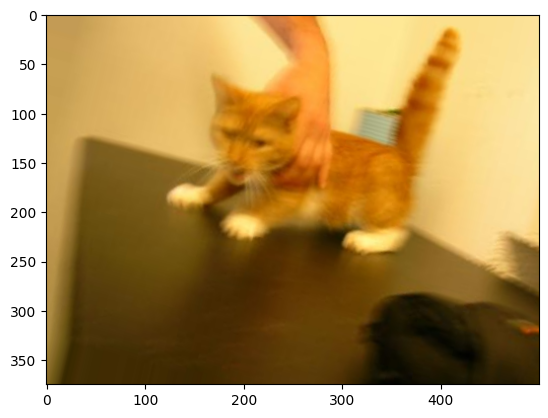

In [15]:
plt.imshow(image_gen.random_transform(cat))


In [18]:
image_gen.flow_from_directory('../Data/CATS_DOGS/train/')

Found 18743 images belonging to 2 classes.


In [31]:
from keras.layers import Dense,Activation, Dropout, Flatten, Conv2D,MaxPooling2D

In [32]:
input_shape=(150,150,3)

In [33]:
from keras.models import Sequential

In [34]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
batch_size=16

train_image_gen=image_gen.flow_from_directory('../Data/CATS_DOGS/train',target_size=input_shape[:2],batch_size=batch_size,class_mode='binary')

Found 18743 images belonging to 2 classes.


In [37]:

test_image_gen=image_gen.flow_from_directory('../Data/CATS_DOGS/test',target_size=input_shape[:2],batch_size=batch_size,class_mode='binary')

Found 6251 images belonging to 2 classes.


In [ ]:
results=model.fit(train_image_gen,epochs=100,steps_per_epoch=150,validation_data=test_image_gen,validation_steps=12)

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.5813 - loss: 0.6725 - val_accuracy: 0.6094 - val_loss: 0.6506
Epoch 2/100
136/150 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.5935 - loss: 0.6650

/home/tanjiro/Github/cv/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.5948 - loss: 0.6648 - val_accuracy: 0.5521 - val_loss: 0.6889
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1312s 9s/step - accuracy: 0.5715 - loss: 0.6841 - val_accuracy: 0.6510 - val_loss: 0.6247
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.6149 - loss: 0.6759 - val_accuracy: 0.6615 - val_loss: 0.6296
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.6325 - loss: 0.6453 - val_accuracy: 0.5885 - val_loss: 0.6735
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.6563 - loss: 0.6345 - val_accuracy: 0.6354 - val_loss: 0.6075
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.6590 - loss: 0.6232 - val_accuracy: 0.6510 - val_loss: 0.5911
Epoch 8/100
122/150 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.6495 - loss: 0.6471

2024-06-25 15:08:16.084577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.6491 - loss: 0.6464 - val_accuracy: 0.6250 - val_loss: 0.6268
Epoch 9/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.6587 - loss: 0.6185 - val_accuracy: 0.6354 - val_loss: 0.6456
Epoch 10/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.6485 - loss: 0.6202 - val_accuracy: 0.6875 - val_loss: 0.5639
Epoch 11/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.6693 - loss: 0.6027 - val_accuracy: 0.7240 - val_loss: 0.5503
Epoch 12/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.6959 - loss: 0.5878 - val_accuracy: 0.6510 - val_loss: 0.6207
Epoch 13/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.7152 - loss: 0.5642 - val_accuracy: 0.7292 - val_loss: 0.5669
Epoch 14/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.6807 - loss: 0.5989 - val_accuracy: 0.6823 - val_loss: 0.5667
Epoch 15/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.6964 - loss:

2024-06-25 15:10:49.885076: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.6951 - loss: 0.5682 - val_accuracy: 0.6719 - val_loss: 0.6087
Epoch 17/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.6774 - loss: 0.5852 - val_accuracy: 0.7031 - val_loss: 0.5721
Epoch 18/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.7105 - loss: 0.5854 - val_accuracy: 0.7656 - val_loss: 0.5102
Epoch 19/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - accuracy: 0.6805 - loss: 0.5819 - val_accuracy: 0.7396 - val_loss: 0.5348
Epoch 20/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.7385 - loss: 0.5434 - val_accuracy: 0.6719 - val_loss: 0.5539
Epoch 21/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.7119 - loss: 0.5611 - val_accuracy: 0.7344 - val_loss: 0.5103
Epoch 22/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.6987 - loss: 0.5617 - val_accuracy: 0.6875 - val_loss: 0.5752
Epoch 23/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.7104 - loss

2024-06-25 15:13:23.495603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.7259 - loss: 0.5471 - val_accuracy: 0.7135 - val_loss: 0.5129
Epoch 25/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.7276 - loss: 0.5331 - val_accuracy: 0.7240 - val_loss: 0.5371
Epoch 26/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.7033 - loss: 0.5727 - val_accuracy: 0.7656 - val_loss: 0.5060
Epoch 27/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.7095 - loss: 0.5411 - val_accuracy: 0.7552 - val_loss: 0.5154
Epoch 28/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.7535 - loss: 0.5140 - val_accuracy: 0.7344 - val_loss: 0.5566
Epoch 29/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - accuracy: 0.7464 - loss: 0.5246 - val_accuracy: 0.6927 - val_loss: 0.5493
Epoch 30/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.7511 - loss: 0.4937 - val_accuracy: 0.7812 - val_loss: 0.5054
Epoch 31/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.7593 - loss

2024-06-25 15:15:56.565633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.7444 - loss: 0.5167 - val_accuracy: 0.7812 - val_loss: 0.5003
Epoch 33/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - accuracy: 0.7467 - loss: 0.5186 - val_accuracy: 0.6729 - val_loss: 0.6165
Epoch 34/100
  1/150 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.6875 - loss: 0.4770

2024-06-25 15:16:16.361551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - accuracy: 0.7441 - loss: 0.5167 - val_accuracy: 0.6875 - val_loss: 0.5783
Epoch 35/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.7355 - loss: 0.5434 - val_accuracy: 0.7552 - val_loss: 0.4536
Epoch 36/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.7452 - loss: 0.5204 - val_accuracy: 0.7083 - val_loss: 0.5052
Epoch 37/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.7431 - loss: 0.5226 - val_accuracy: 0.7656 - val_loss: 0.4811
Epoch 38/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.7570 - loss: 0.5070 - val_accuracy: 0.7656 - val_loss: 0.4931
Epoch 39/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.7524 - loss: 0.5144 - val_accuracy: 0.7812 - val_loss: 0.4624
Epoch 40/100
122/150 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.7627 - loss: 0.4896

2024-06-25 15:18:29.878011: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.7604 - loss: 0.4927 - val_accuracy: 0.7500 - val_loss: 0.4641
Epoch 41/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.7424 - loss: 0.5185 - val_accuracy: 0.7865 - val_loss: 0.4728
Epoch 42/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - accuracy: 0.7727 - loss: 0.4873 - val_accuracy: 0.8125 - val_loss: 0.4352
Epoch 43/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.7696 - loss: 0.4902 - val_accuracy: 0.7604 - val_loss: 0.4808
Epoch 44/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.7727 - loss: 0.4846 - val_accuracy: 0.7760 - val_loss: 0.4829
Epoch 45/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.7559 - loss: 0.4836 - val_accuracy: 0.6875 - val_loss: 0.5718
Epoch 46/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.7794 - loss: 0.4650 - val_accuracy: 0.7604 - val_loss: 0.4982
Epoch 47/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.7623 - loss

2024-06-25 15:21:03.251130: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.7738 - loss: 0.5001 - val_accuracy: 0.7865 - val_loss: 0.4881
Epoch 49/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.7383 - loss: 0.5336 - val_accuracy: 0.6979 - val_loss: 0.5339
Epoch 50/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 22441s 151s/step - accuracy: 0.7766 - loss: 0.4550 - val_accuracy: 0.7292 - val_loss: 0.5345
Epoch 51/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 150ms/step - accuracy: 0.7777 - loss: 0.4819 - val_accuracy: 0.7604 - val_loss: 0.4944
Epoch 52/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.7756 - loss: 0.4849 - val_accuracy: 0.7448 - val_loss: 0.4909
Epoch 53/100
 25/150 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.7544 - loss: 0.5427